#### 1) Test imports

In [1]:
from partial_ranker import MeasurementsSimulator
from partial_ranker import MeasurementsVisualizer
from partial_ranker import QuantileComparer
from partial_ranker import Graph
from partial_ranker import PartialRankerDFG
from partial_ranker import PartialRankerDFGReduced
from partial_ranker import PartialRankerMin
from partial_ranker import PartialRanker
from partial_ranker import Method

#### 2) Test measurement simulation and visualization

In [2]:
import numpy as np

def create_measurements(n_objs, n_reps, seed=129):
    obj_params = {}
    for i in range(n_objs):
        obj_params[f'obj{i}'] = [np.random.uniform(0,1), np.random.uniform(0,0.1)]
    ms = MeasurementsSimulator(obj_params,seed=seed)
    ms.measure(reps=n_reps)
    return ms.get_measurements()

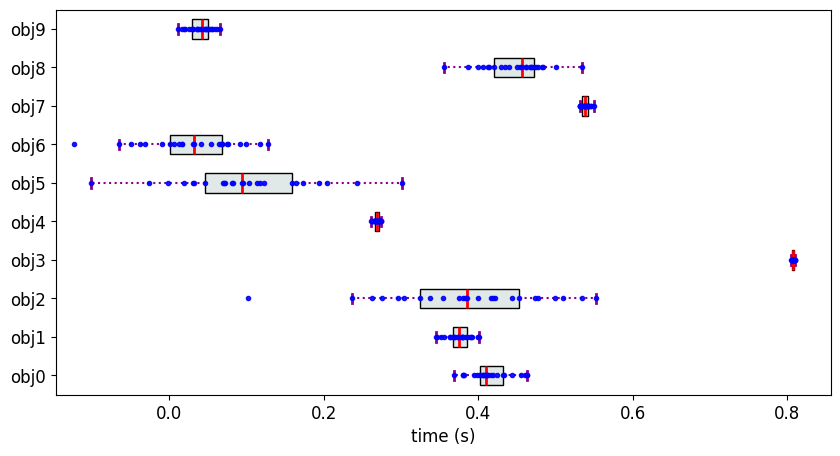

In [3]:
measurements = create_measurements(10, 25)
mv = MeasurementsVisualizer(measurements)
fig = mv.show_measurements_boxplots(scale=0.5)

#### 2) Test Quantile Compare

In [4]:
import pandas as pd

comparer = QuantileComparer(measurements)
comparer.compute_quantiles(q_max=75, q_min=25,outliers=False)
comparer.compare()
pd.DataFrame(comparer.C)

,obj0,obj1,obj2,obj3,obj4,obj5,obj6,obj7,obj8,obj9
obj0,-1,0,1,2,0,0,0,2,1,0
obj1,2,-1,1,2,0,0,0,2,2,0
obj2,1,1,-1,2,0,0,0,2,1,0
obj3,0,0,0,-1,0,0,0,0,0,0
obj4,2,2,2,2,-1,0,0,2,2,0
obj5,2,2,2,2,2,-1,1,2,2,1
obj6,2,2,2,2,2,1,-1,2,2,1
obj7,0,0,0,2,0,0,0,-1,0,0
obj8,1,0,1,2,0,0,0,2,-1,0
obj9,2,2,2,2,2,1,1,2,2,-1


#### 3) Test PartialRankerDFG

In [5]:
pr_dfg = PartialRankerDFG(comparer)
pr_dfg.compute_ranks()
pr_dfg.get_ranks()

{3: ['obj0', 'obj8'],
 2: ['obj1', 'obj2'],
 5: ['obj3'],
 1: ['obj4'],
 0: ['obj5', 'obj6', 'obj9'],
 4: ['obj7']}

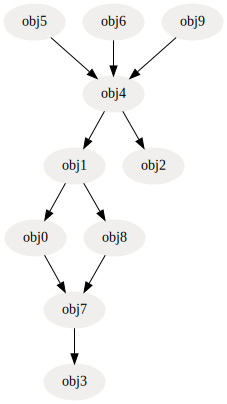

In [6]:
pr_dfg.get_dfg().visualize()

#### 4) Test PartialRankerDFGReduced

In [7]:
pr_dfg_r = PartialRankerDFGReduced(comparer)
pr_dfg_r.compute_ranks()
pr_dfg_r.get_ranks()

{0: ['obj5', 'obj6', 'obj9'],
 1: ['obj4'],
 2: ['obj1', 'obj2', 'obj0', 'obj8'],
 3: ['obj7'],
 4: ['obj3']}

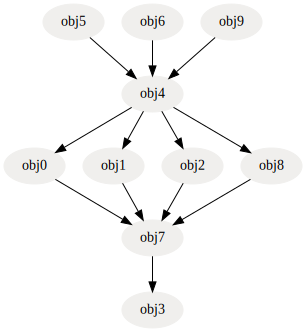

In [8]:
pr_dfg_r.get_dfg().visualize()

#### 5) Test PartialRankerMin

In [9]:
pr_m = PartialRankerMin(comparer)
pr_m.compute_ranks()
pr_m.get_ranks()

{0: {'obj5', 'obj6', 'obj9'},
 1: {'obj4'},
 2: {'obj0', 'obj1', 'obj2', 'obj8'},
 3: {'obj7'},
 4: {'obj3'}}

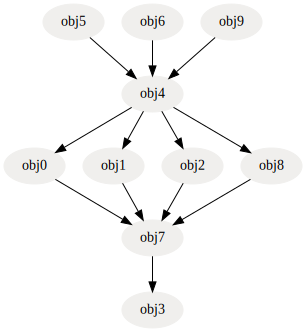

In [10]:
pr_m.get_dfg().visualize()

#### 6) Reordered visualization

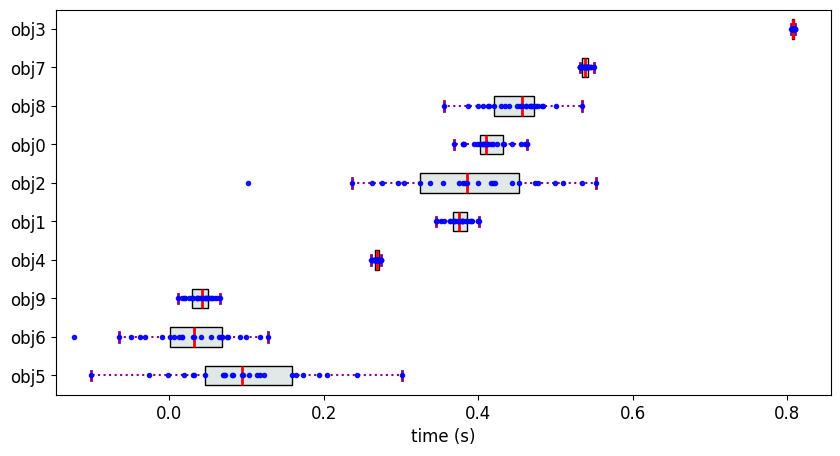

In [11]:
T = pr_dfg_r.graph_H.get_separable_arrangement()
mv = MeasurementsVisualizer(measurements,T)
fig = mv.show_measurements_boxplots(scale=0.5)


#### 7) Test the generic class

In [12]:
pr = PartialRanker(comparer)

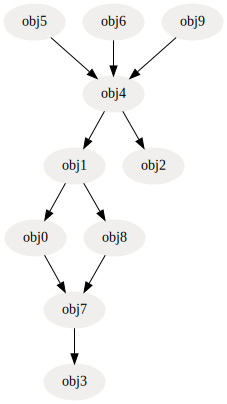

In [13]:
pr.compute_ranks(Method.DFG)
pr.get_dfg().visualize()

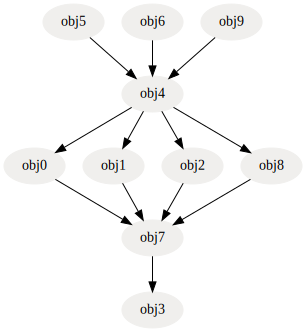

In [14]:
pr.compute_ranks(Method.DFGReduced)
pr.get_dfg().visualize()

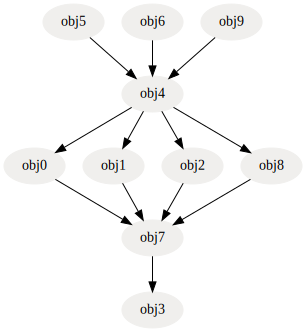

In [16]:
pr.compute_ranks(Method.Min)
pr.get_dfg().visualize()

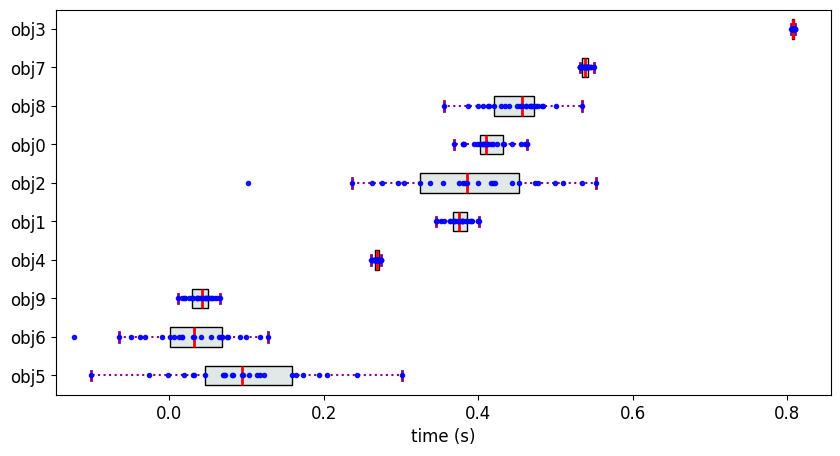

In [17]:
T = pr.get_separable_arrangement()
mv = MeasurementsVisualizer(measurements,T)
fig = mv.show_measurements_boxplots(scale=0.5)